# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
import time
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque

scores_sliding_window is a deque of maximum length 100 that stores the scores achieved by the algorithm on the last 100 episodes.
We can end the external loop (by episodes) if  np.mean(scores_sliding_window) >=13 

In [6]:
def dqn(n_episodes=2000, eps_start=.99, eps_end=0.01, eps_decay = .996, train_numb = 0):
    """
    n_episodes: maximum number of training episodes
    eps_start: starting value of epsilon, for epsilon-greedy action selection
    eps_end: minimum value of epsilon
    eps_decay: multiplicative factor (per episode) for decreasing epsilon
    """

    start_time = time.time()                                  
    scores = []                                              # list of scores for each episode
    scores_sliding_window = deque(maxlen=100)                # stores the last 100 scores
    eps = eps_start                                          # initialize epsilon

    for i_episode in range(1, n_episodes+1):                 # external loop by episodes
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]              # get the current state 
        score = 0                                            # reset the score counter
        done = False                                         
        while not done:                                      # internal loop in the episode
            action = agent.act(state,eps)                    # next action from agent 
            action = int(action)                             
            env_info = env.step(action)[brain_name]          # send the action to the environment
            next_state = env_info.vector_observations[0]     # get the next state
            reward = env_info.rewards[0]                     # get the reward
            done = env_info.local_done[0]                    # done = true when the episode has finished
            agent.step(state,action,reward,next_state, done) # next learning step by state and reward
            score += reward                                  # count our rewards
            state = next_state                               # update state
            if done:                                         
                break                                        
        scores_sliding_window.append(score)                  # save score in the deque with max 100 elements
        scores.append(score)
        
        eps = max(eps_end,eps_decay*eps)                     # make epsilon a bit smaller
        
        count = 0                                            # how many times we've reached 13
        for j in range(len(scores_sliding_window)):                
            if scores_sliding_window[j] >= 13:
                count+=1
                
        elapsed = datetime.timedelta(seconds = time.time()-start_time)  # elapsed time
        
        print('\rEpisode: {}, elapsed: {}, Avg.Score: {:.2f},  score {}, How many scores >= 13: {}, eps.: {:.2f}'. \
            format(i_episode, elapsed, np.mean(scores_sliding_window), score, count, eps), end="")
        
        if np.mean(scores_sliding_window) >=13:  # end criteria.
            print("\n terminating at episode :", i_episode, "ave reward reached +13 over 100 episodes")
            break
            
    torch.save(agent.qnetwork_local.state_dict(), 'saved_models/' + 'weights_'+str(train_numb)+'.pth') # save the weights 
    return scores, i_episode

### Training the network with different hyperparameters

We run the training sessions with different hyperparameters fc1_units, fc2_units, eps_start. For each session, we save the weights using torch.save function. Therefore, for each training session, the weights are saved into the file:  <b>'weights_' + str(train_numb)+ '.pth'</b>

In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline 

fc1_units:  48 , fc2_units:  56
train_numb:  0 eps_start:  0.988
Episode: 616, elapsed: 0:08:54.131796, Avg.Score: 13.04,  score 19.0, How many scores >= 13: 58, eps.: 0.08
 terminating at episode : 616 ave reward reached +13 over 100 episodes


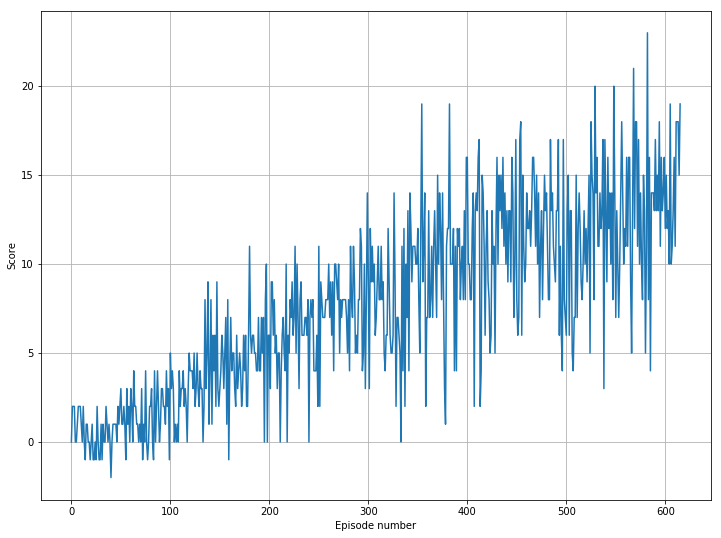



fc1_units:  80 , fc2_units:  72
train_numb:  1 eps_start:  0.994
Episode: 599, elapsed: 0:08:44.640565, Avg.Score: 13.00,  score 18.0, How many scores >= 13: 57, eps.: 0.09
 terminating at episode : 599 ave reward reached +13 over 100 episodes


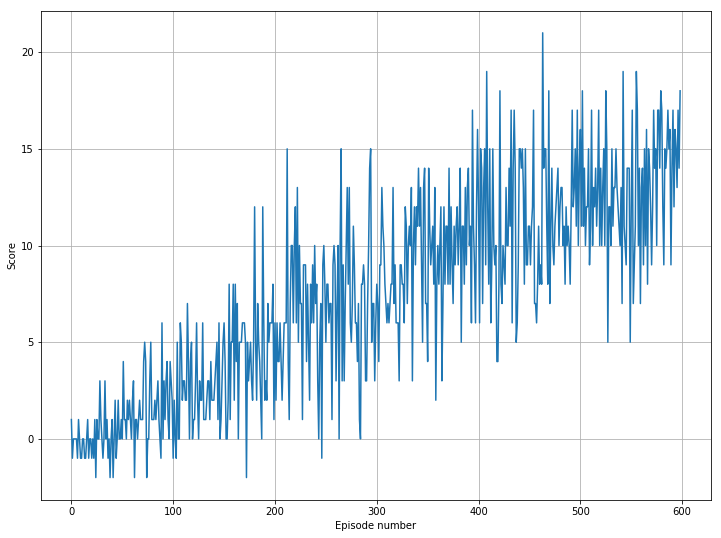



fc1_units:  64 , fc2_units:  48
train_numb:  2 eps_start:  0.992
Episode: 590, elapsed: 0:09:23.216697, Avg.Score: 13.00,  score 8.0, How many scores >= 13: 56, eps.: 0.099
 terminating at episode : 590 ave reward reached +13 over 100 episodes


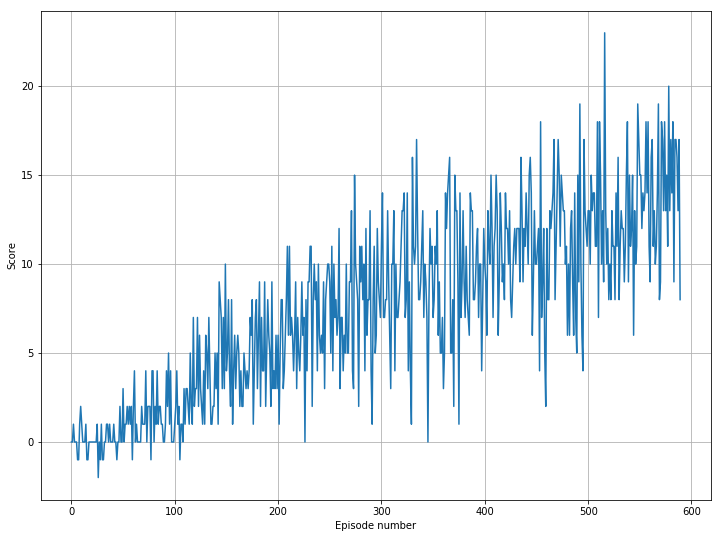



fc1_units:  64 , fc2_units:  64
train_numb:  3 eps_start:  0.992
Episode: 573, elapsed: 0:09:11.075954, Avg.Score: 13.04,  score 23.0, How many scores >= 13: 59, eps.: 0.10
 terminating at episode : 573 ave reward reached +13 over 100 episodes


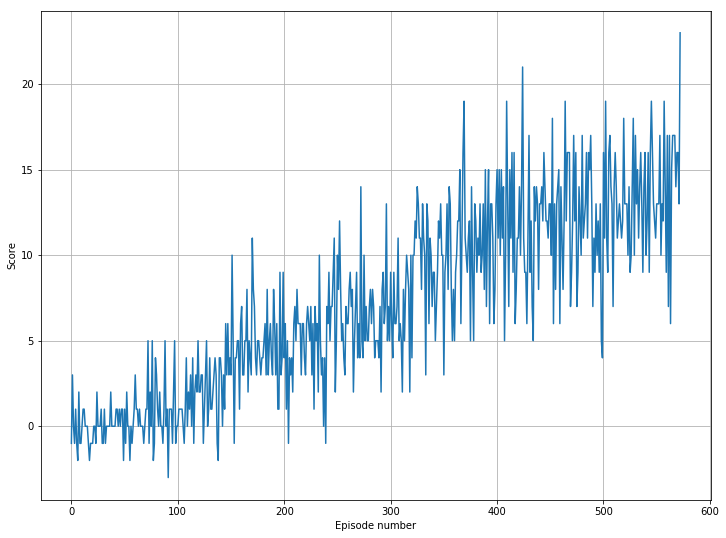

In [8]:
fc1_units_lst = []
fc2_units_lst = []
eps_start_lst = []
episodes_lst  = []

numb_of_trains = 4
for i in range(0, numb_of_trains):
    
    #generate random number of nodes
    fc1_nodes = random.randrange(48, 128, 16) 
    fc2_nodes = random.randrange(fc1_nodes - 16 , fc1_nodes + 16, 8)   # with step 8 

    # initialize epsilon
    epsilon_start = random.randrange(988, 995, 1)/1000.0
    
    print('fc1_units: ', fc1_nodes, ', fc2_units: ', fc2_nodes)
    print('train_numb: ', i, 'eps_start: ',epsilon_start)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units=fc1_nodes, fc2_units=fc2_nodes)
    scores, episodes = dqn(n_episodes = 2000, eps_start = epsilon_start, train_numb=i)  # train with params
    fc1_units_lst.append(fc1_nodes)
    fc2_units_lst.append(fc2_nodes)
    eps_start_lst.append(epsilon_start)
    episodes_lst.append(episodes)
    
    # plot
    fig = plt.figure(figsize=(12, 9))
    plt.plot(scores)
    plt.xlabel('Episode number')
    plt.ylabel('Score')
    plt.grid()
    plt.show()
    print("\n========================================================================\n")

### Getting the average score for different testing sessions

We run testing for each model weights_i.pth (i = 0,1,2,...) several times to get the average score for the given set of parameters. The function test_session constructs the agent with the parameters fc1_units and fc2_units corresponding to the given weights file.

In [9]:
def test_session(env, train_n, test, fc1_n, fc2_n, eps_s, episodes):
    agent = Agent(state_size=37, action_size=4, seed=17, fc1_units=fc1_n, fc2_units=fc2_n)  
    file_weights = 'saved_models/' + 'weights_'+str(train_n)+'.pth'   # model weights
    agent.qnetwork_local.load_state_dict(torch.load(file_weights))   # load weights 

    env_info = env.reset(train_mode=False)[brain_name]   # reset the environment
    state = env_info.vector_observations[0]              # get the current state
    score = 0                                            # initialize the score
    while True:
        action = agent.act(state,.05)                    # selecting an action
        action = int(action)
        env_info = env.step(action)[brain_name]          # send the action to the environment
        next_state = env_info.vector_observations[0]     # getting the next state
        reward = env_info.rewards[0]                     # getting the reward
        done = env_info.local_done[0]                    # see if episode has finished
        score += reward                                  # update the score
        state = next_state                               # roll over the state to next time step
        if done:                                         # exit loop if episode finished
            break
    
    print('Train: {}, Test: {}, Episode: {}, fc1_units: {}, fc2_units: {}, eps_start: {}, Score: {}'\
          .format(train_n, test, episodes, fc1_n, fc2_n, eps_s, score))
    return score

for i in range(0, numb_of_trains):
    fc1_nodes = fc1_units_lst[i]
    fc2_nodes = fc2_units_lst[i]
    eps_start = eps_start_lst[i]
    episodes  = episodes_lst[i]
    list_scores = []

    for test in range(7):        
        score = test_session(env=env, train_n=i, test=test, fc1_n=fc1_nodes, fc2_n=fc2_nodes, eps_s=eps_start, episodes=episodes)
        list_scores.append(score)
    avg_score =  np.mean(list_scores)
    print('Average Score: ', avg_score)
    print('===================================================================')

Train: 0, Test: 0, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 13.0
Train: 0, Test: 1, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 9.0
Train: 0, Test: 2, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 14.0
Train: 0, Test: 3, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 11.0
Train: 0, Test: 4, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 15.0
Train: 0, Test: 5, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 9.0
Train: 0, Test: 6, Episode: 616, fc1_units: 48, fc2_units: 56, eps_start: 0.988, Score: 17.0
Average Score:  12.5714285714
Train: 1, Test: 0, Episode: 599, fc1_units: 80, fc2_units: 72, eps_start: 0.994, Score: 15.0
Train: 1, Test: 1, Episode: 599, fc1_units: 80, fc2_units: 72, eps_start: 0.994, Score: 9.0
Train: 1, Test: 2, Episode: 599, fc1_units: 80, fc2_units: 72, eps_start: 0.994, Score: 13.0
Train: 1, Test: 3, Episode: 599, fc1_units:

In [10]:
env.close()